In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to determine the season for a given date
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Load cleaned and filtered accommodation data
cleaned_airbnb_data = pd.read_csv('Resources/cleaned_airbnb_listings_usa.csv')

# Ensure the 'last_review' column is in datetime format
cleaned_airbnb_data['last_review'] = pd.to_datetime(cleaned_airbnb_data['last_review'])

# Apply the function to create a 'season' column in the DataFrame
cleaned_airbnb_data['season'] = cleaned_airbnb_data['last_review'].apply(get_season)

# Display the DataFrame with the new 'season' column
print(cleaned_airbnb_data.head())


         id                                               name    host_id  \
0  29819757   Hotel Perks - Private Bedroom | Private Bathroom   57387860   
1      8357  The Mushroom Dome Retreat & LAND of Paradise S...      24281   
2  42409434                               The Burlington Hotel  229716119   
3  35158303                     SAHARA Las Vegas, Marra 1 King  263748930   
4  44799007             Sonder Battery Park | Studio Apartment  219517861   

   neighbourhood_group                                neighbourhood  latitude  \
0                  NaN                              Near North Side  41.89230   
1                  NaN                         Unincorporated Areas  37.00939   
2  City of Los Angeles                                     Westlake  34.05981   
3                  NaN                         Unincorporated Areas  36.14215   
4                  NaN  Ward F (councilmember Jermaine D. Robinson)  40.70617   

   longitude        room_type  price  minimum_nigh

In [2]:
# Group by 'season' and calculate average metrics
seasonal_data = cleaned_airbnb_data.groupby('season').agg({
    'price': 'mean',
    'number_of_reviews': 'mean',
    'reviews_per_month': 'mean',
    'availability_365': 'mean'
}).reset_index()

# Rename columns for clarity
seasonal_data.columns = ['Season', 'Average Price', 'Average Number of Reviews', 'Average Reviews per Month', 'Average Availability']

# Display the aggregated data
print("Seasonal Data Aggregation:")
print(seasonal_data)


Seasonal Data Aggregation:
   Season  Average Price  Average Number of Reviews  \
0    Fall     171.784197                 217.583297   
1  Spring     169.415716                 178.680608   
2  Summer     188.428581                 191.756766   
3  Winter     164.944304                 173.074684   

   Average Reviews per Month  Average Availability  
0                   4.217785            179.118064  
1                   2.482269            125.859949  
2                   3.254885            175.655686  
3                   2.353291            113.682278  


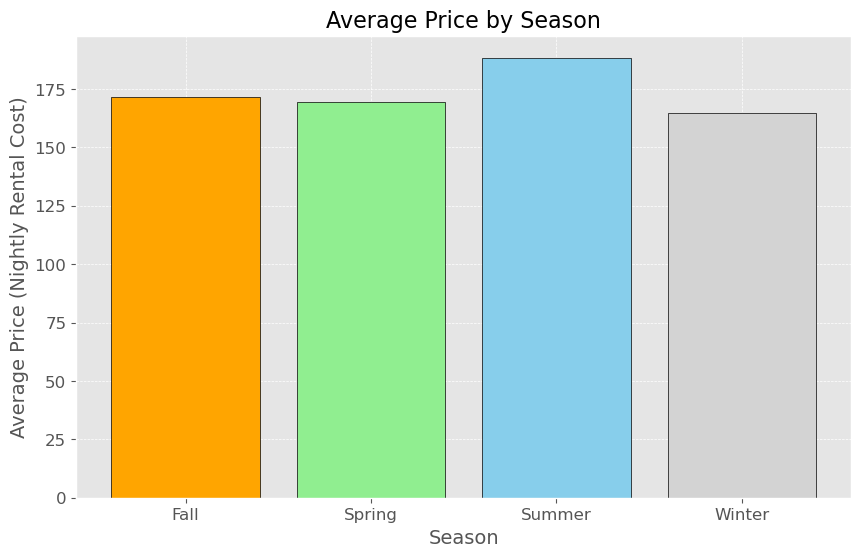

In [3]:
# Define colors for each season
season_colors = {
    'Spring': 'lightgreen',
    'Summer': 'skyblue',
    'Fall': 'orange',
    'Winter': 'lightgrey'
}

# Set plot style
plt.style.use('ggplot')

# Plot Average Price by Season
plt.figure(figsize=(10, 6))
plt.bar(seasonal_data['Season'], seasonal_data['Average Price'], color=[season_colors[season] for season in seasonal_data['Season']], edgecolor='black')
plt.title('Average Price by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Price (Nightly Rental Cost)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


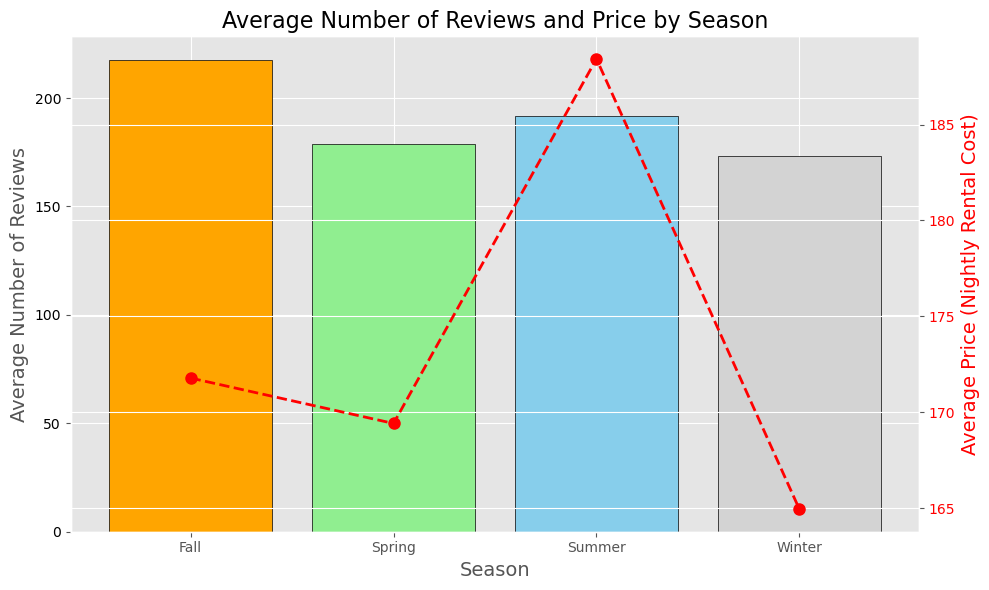

In [4]:
# Plot Average Number of Reviews by Season with Price
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(seasonal_data['Season'], seasonal_data['Average Number of Reviews'], color=[season_colors[season] for season in seasonal_data['Season']], edgecolor='black')
ax1.set_xlabel('Season', fontsize=14)
ax1.set_ylabel('Average Number of Reviews', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Average Number of Reviews and Price by Season', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(seasonal_data['Season'], seasonal_data['Average Price'], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8)
ax2.set_ylabel('Average Price (Nightly Rental Cost)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.xticks(fontsize=12)
plt.show()


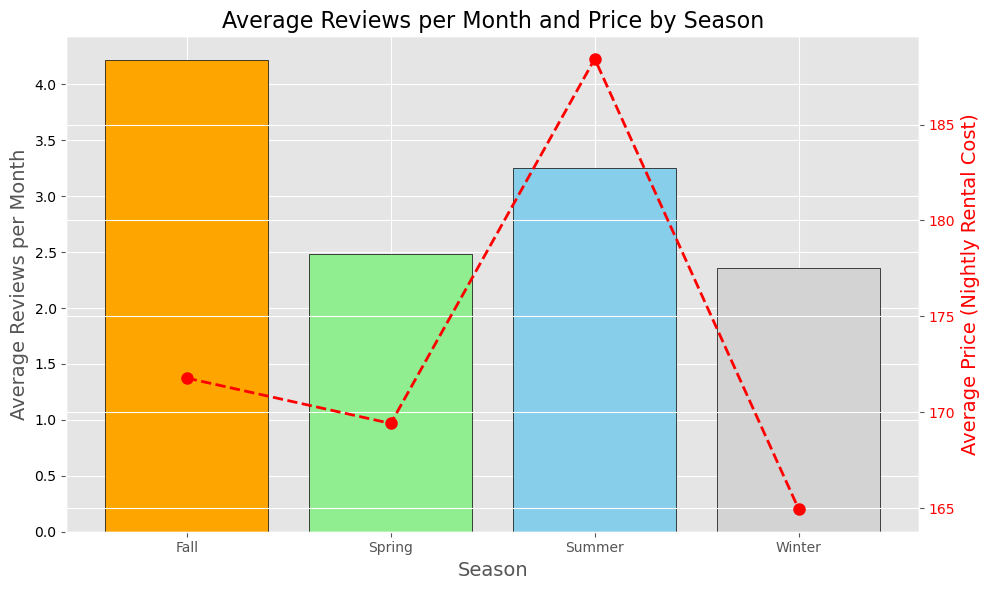

In [5]:
# Plot Average Reviews per Month by Season with Price
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(seasonal_data['Season'], seasonal_data['Average Reviews per Month'], color=[season_colors[season] for season in seasonal_data['Season']], edgecolor='black')
ax1.set_xlabel('Season', fontsize=14)
ax1.set_ylabel('Average Reviews per Month', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Average Reviews per Month and Price by Season', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(seasonal_data['Season'], seasonal_data['Average Price'], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8)
ax2.set_ylabel('Average Price (Nightly Rental Cost)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.xticks(fontsize=12)
plt.show()

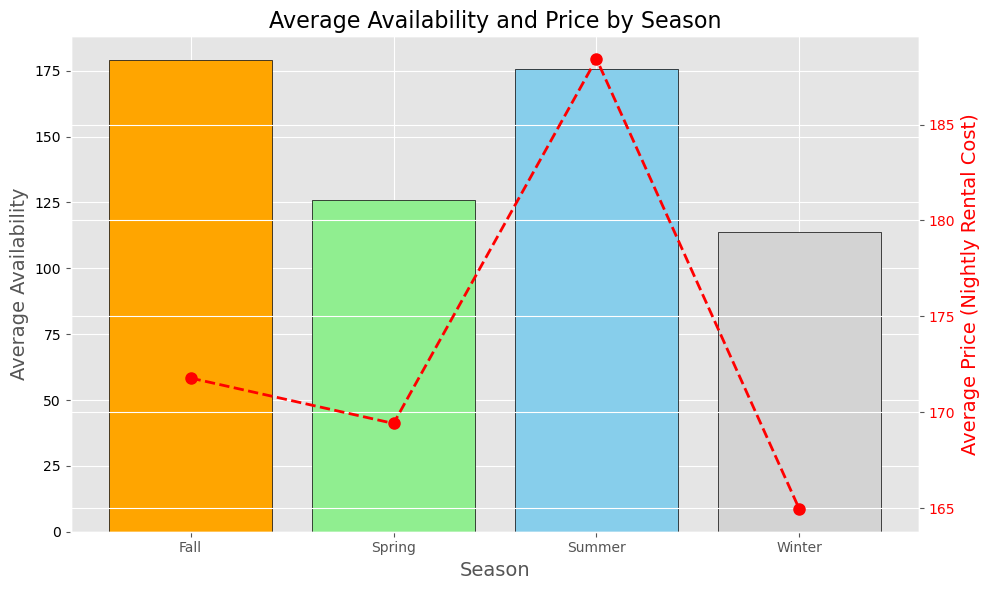

In [6]:
# Plot Average Availability by Season with Price
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(seasonal_data['Season'], seasonal_data['Average Availability'], color=[season_colors[season] for season in seasonal_data['Season']], edgecolor='black')
ax1.set_xlabel('Season', fontsize=14)
ax1.set_ylabel('Average Availability', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Average Availability and Price by Season', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(seasonal_data['Season'], seasonal_data['Average Price'], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8)
ax2.set_ylabel('Average Price (Nightly Rental Cost)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.xticks(fontsize=12)
plt.show()